[<img src="images/quantum_algorithms_tutorials.png" alt="drawing" width="100" align="left"/>][5]

<h2 align="center">
Quantum parallelism and Deutsch–Jozsa algorithm
</h2>

**[[Homepage][5]]**\
**[[Open with the nbviewer.][6]]**

<h3 align="left">
1. Quantum parallelism
</h3>

In this tutorial, we are going to introduce 3 separate problems and we will mainly follow the [[1]] book's approach of describing them. After giving descriptions we will implement them with Qiskit. So, let's start with quantum parallelism, which is one of the powerful tools/properties that is used in the quantum computers. Quantum parallelism enables us to simultaneously compute the outputs of a function for given different inputs. Let's say we have two registers one for input the other one for output. The initial state is given by $\left| x \right\rangle \left| 0 \right\rangle$ wavefunction, where $\left| x \right\rangle$ is the register that takes $x$ input and $\left| 0 \right\rangle$ is the output register where the value of the $f(x)$ function will be stored. After applying the circuit that corresponds to the given function the wavefunction becomes $\left| x \right\rangle \left| f(x) \right\rangle$. Here is the circuit:

<img src="images/qparallel.png" alt="drawing" width="300"/>

The $U_{f(x)}$ is the unitary operator that acts on both  registers and corresponds to the given $f(x)$ function. Let's see what happens when instead of one $\left| x \right\rangle$ bit string, we have a superposition state of all possible bit strings:

$$\frac{1}{2}\sum_{x} \left| x \right\rangle = \frac{1}{2} \left[ \left| 00 \right\rangle + \left| 01 \right\rangle + \left| 10 \right\rangle + \left| 11 \right\rangle \right]$$

The coefficient in front of the state is for normalization (sum of all bit string probabilities in the superposition state must be unity). This superposition state will let us witness the quantum parallelism in action. Now let's write down the combined state of two registers:

$$\left| \psi_{initial} \right\rangle = \frac{1}{2} \left| 0 \right\rangle \sum_{x} = \frac{1}{2}  \left[ \left| 0 \right\rangle \left| 00 \right\rangle + \left| 0 \right\rangle \left| 01 \right\rangle + \left| 0 \right\rangle \left| 10 \right\rangle + \left| 0 \right\rangle \left| 11 \right\rangle \right]$$

After $U_{f(x)}$ unitary operator the state will look like this:

$$\left| \psi_{final} \right\rangle = \frac{1}{2}  \left[ \left| f(00) \right\rangle \left| 00 \right\rangle + \left| f(01) \right\rangle \left| 01 \right\rangle + \left| f(10) \right\rangle \left| 10 \right\rangle + \left| f(11) \right\rangle \left| 11 \right\rangle \right]$$

We are already there. So, we have applied one $U_{f(x)}$ unitary operator, but, in fact, the $f(x)$ function was evaluated 4 times for each term from the superposition state. This effect is called quantum parallelism, and this quantum computing "tool" is widely used in lots of quantum algorithms. Let see how it works for some specific function. Suppose we have a function that for those $\left| x \right\rangle$ bit strings that have even number of $1$s the function $f(x) = 0$ and when the number of $1$s is odd the function $f(x) = 1$. To make things more interesting we will use $3$ qubits for the input register. Here is the circuit:

<img src="images/qparallel_example.png" alt="drawing" width="400"/>

where $i$ indices denote the input qubits and $o$ denotes the output qubit. Here the first 3 Hadamard gates are for preparing a $3$ qubit superposition state. The CNOT gates represent our given function $f(x)$ that has an output $0$ if there are even number of $1$s in the input register and $1$ otherwise. Now let's go step by step and see how the quantum state changes. The initial $\left| \psi_{0} \right\rangle$ quantum state:

$$\left| \psi_{0} \right\rangle = \left| 0 \right\rangle_o \left| 000 \right\rangle_i$$

After 3 Hadamard gates the $\left| \psi_{1} \right\rangle$ quantum state looks like this (omitting the qubit indices):

$$\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle \left[ \left| 000 \right\rangle + \left| 001 \right\rangle + \left| 010 \right\rangle + \left| 011 \right\rangle + \left| 100 \right\rangle + \left| 101 \right\rangle + \left| 110 \right\rangle + \left| 111 \right\rangle \right]$$

Or in more compact form:

$$\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle \sum_x \left| x \right\rangle,$$

where $x$ changes from $000$ to $111$. Here is the Hadamard gate and its actions on $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$ states: 

\begin{align*}
&H \left| 0 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) 
\\
&H \left| 1 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\
1 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) 
\end{align*}

If one applies Hadamard gates on $n$ qubits in the $\left| 0 \right\rangle$ initial state, it creates the $\frac{1}{\sqrt{2^n}}\sum_x \left| x \right\rangle$ superposition state with equal probabilities for each bit string. Here $x$ changes from $00...0$ to $11...1$.

After CNOT gates that implements the $f(x)$ function the quantum state $\left| \psi_2 \right\rangle$ will become:

$$\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \sum_x \left| f(x) \right\rangle  \left| x \right\rangle$$

Or in a more explicit form:

$$\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \left[ \left| 0 \right\rangle \left| 000 \right\rangle + \left| 1 \right\rangle \left| 001 \right\rangle + \left| 1 \right\rangle \left| 010 \right\rangle + \left| 0 \right\rangle \left| 011 \right\rangle + \left| 1 \right\rangle \left| 100 \right\rangle + \left| 0 \right\rangle \left| 101 \right\rangle + \left| 0 \right\rangle \left| 110 \right\rangle + \left| 1 \right\rangle \left| 111 \right\rangle \right]$$

To check this calculation one should know the action of CNOT gate. For example, if CNOT is acting on an arbitrary two-qubit state $a \left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 10 \right\rangle + d \left| 11 \right\rangle$, where $a$, $b$, $c$ and $d$ are some arbitrary complex numbers that satisfy $\left| a \right|^2 + \left| b \right|^2 + \left| c \right|^2 + \left| d \right|^2 = 1$ (normalization). After acting CNOT gate, that is controlled from the first qubit, we will obtain the following state $\left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 11 \right\rangle + d \left| 10 \right\rangle$, where we changed the second qubit state when the first qubit was in $\left|1\right\rangle$ state.

Now let's write a code for this circuit:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [6]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_parallelism_Deutsch_Jozsa.ipynb

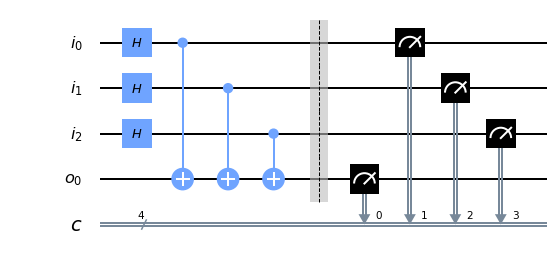

In [1]:
from qiskit import *

# Initialization of registers where we store the qubits and classical bits 
# and the quantum circuit acting on those registers
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(4, "c")
parallelism_circuit = QuantumCircuit(input_register, output_register, classical_register)

# Hadamard gates acting on qubits in the input register
parallelism_circuit.h(input_register[0])
parallelism_circuit.h(input_register[1])
parallelism_circuit.h(input_register[2])

# CNOTs controlled by qubits from the input register 
# and applied on the qubit from the output register
parallelism_circuit.cx(input_register[0], output_register[0])
parallelism_circuit.cx(input_register[1], output_register[0])
parallelism_circuit.cx(input_register[2], output_register[0])

# Just for a nice drawing of the circuit, add a barrier 
# to separate measurements and gates in the picture
parallelism_circuit.barrier()

# Measurements on the qubits from the output register and input register
# the results are stored in the classical bits from the classical register
parallelism_circuit.measure(output_register[0], classical_register[0])
parallelism_circuit.measure(input_register[0], classical_register[1])
parallelism_circuit.measure(input_register[1], classical_register[2])
parallelism_circuit.measure(input_register[2], classical_register[3])

# Let's draw the circuit 
%matplotlib inline
parallelism_circuit.draw(output="mpl")

Now we will run this circuit on a quantum computer simulator and plot the results in the histogram.

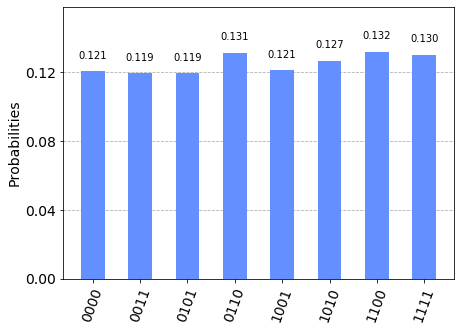

In [2]:
from qiskit.visualization import plot_histogram

# The quantum computer simulator that we will use
simulator = BasicAer.get_backend('qasm_simulator')

# The execution of the circuit with a given number  
# of shots (number of execution) for statistics
job = execute(parallelism_circuit, simulator, shots=8096)
result = job.result()
counts = result.get_counts()

# The plot of the results in the histogram
plot_histogram(counts)

Note that the first bit in the histogram is the qubit from the output register and the rest bits are from the input register. One can notice that the output register is $0$ when we have an even number of $1$s in the input register and, otherwise, the output register is $1$. Also, the probability of the outcome of one of the states are equal to each other and equal to $\approx 0.125 = \left|\frac{1}{\sqrt{2^3}}\right|^2$, as was predicted in the formulas describing the superposition state. This procedure of the measurements is not the best thing that we can do with quantum parallelism. Sometimes we will need more sophisticated measurements (quantum state tomography) to understand the action of the circuit, which may consume a lot of execution time. So we should use quantum parallelism more wisely in order to not lose the speedup that it can provide. One of the approaches is to obtain information about general property of the $f(x)$ function. This approach will be discussed in the next chapters.

<h3 align="left">
2. Deutsch's algorithm
</h3>

In the Deutsch algorithm, we are solving a problem with two qubits. The problem can be described this way [[1]]: Alice and Bob live in different cities and they are playing a "funny" game. Alice prepares her qubits and sends them to Bob. Bob applies a function on Alice's qubits and sends them back to Alice. Bob is allowed to choose only one of the 4 possible functions, that are either constant ($f(0) = f(1)$) or balanced ($f(0) \ne f(1)$), and input and output of the function is one bit ($0$ or $1$). Alice should find out from the measurment result was the chosen function balanced or constant. In the course of this algorithm, we will use the concept of quantum parallelism. Here is the circuit for the algorithm (a modified version of the Fig. 1.19 from [[1]]):

<img src="images/Deutsch.png" alt="drawing" width="500"/>

where $\left| x \right\rangle$ is the input register with one qubit, $\left| y \right\rangle$ is the output register also with one qubit, $M$ denotes the measurement. The initial state is $\left| \psi_0 \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle$. Alice applies Hadamard gates on both input and output registers and obtains the $\left| \psi_1 \right\rangle$ state:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right).
$$

Then Alice sends the qubits to Bob. Now Bob should make a decision what $f(x)$ function to use. There are 4 possible functions that Bob can choose. Two of them are constant functions ($f(0) = f(1) = 0$ or $f(0) = f(1) = 1$) and the other two are balanced ($f(0) = 0$ and $f(1) = 1$ or $f(0) = 1$ and $f(1) = 0$). After choosing one of them Bob acts the corresponding circuit on the qubits. The result of the function is stored in the output register by mod 2 sum $\left| y \oplus f(x)\right\rangle$. Let's rewrite the $\left| \psi_1 \right\rangle$ in this way:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) = 
\frac{1}{2} 
\left( \left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) + \left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \right)
$$

After applying circuit for $f(x)$ function one will obtain $\left| \psi_2 \right\rangle$ state that Bob will send back to Alice:

$$
\left| \psi_2 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + \left| 1 \right\rangle \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \right)
$$

Note that the $f(0)$ and $f(1)$ was calculated at the same time by only one action/circuit (quantum parallelism), but they are stored in the different superposition states. Now Bob sends the qubits back to Alice. Alice applies Hadamard gate on the input qubit and obtains the final $\left| \psi_3 \right\rangle$ quantum state before measurement:

$$
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\left( \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \right)
$$

Let's group all superposition states depending on the state of the qubit from the input register.

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle  + \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle - \left| 0 \oplus f(1) \right\rangle +  \left| 1 \oplus f(1) \right\rangle \right) 
\big)
\end{align*}

Now we are going to show that, when the function was balanced the terms in the first bracket cancel each other and final state of the first qubit becomes $\left| 1 \right\rangle$. Otherwise, if the function was constant the terms of the second bracket cancel each other and the final state of the first qubit becomes $\left| 0 \right\rangle$. So, by just measuring the first qubit, Alice can deduce was the function balanced or constant. To see this let's talk about one of the examples. Suppose Bob has chosen a balanced function for which $f(0) = 0$ and $f(1) = 1$. In that case:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle  + \left| 0 \oplus 1 \right\rangle - \left| 1 \oplus 1 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle - \left| 0 \oplus 1 \right\rangle +  \left| 1 \oplus 1 \right\rangle \right) 
\big)
\end{align*}

Note that $\left|1 \oplus 1\right\rangle = \left|0\right\rangle$. $\left|0 \oplus 1\right\rangle = \left|1\right\rangle$, $\left|1 \oplus 0\right\rangle = \left|1\right\rangle$ and $\left|0 \oplus 0\right\rangle = \left|0\right\rangle$ . So:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle  + \left| 1 \right\rangle - \left| 0 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle - \left| 1 \right\rangle +  \left| 0 \right\rangle \right) 
\big) =
\\
& = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

Similar calculations can be done for other functions:

\begin{align*}
&\text{f(0) = 0, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 0, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

One can see that if the function is constant (the first two cases) the qubit in the input register is in the $\left| 0 \right\rangle$ state and if the function is balanced (the last two cases) the qubit is in the $\left| 1 \right\rangle$ state. Here we encounter one more useful property of quantum computation called quantum interference. It arises from the fact that probability amplitudes are complex numbers and they can be subtracted from (added to) each other (in our example: destructive interference $ \left| 0 \right\rangle -  \left| 0 \right\rangle = (1 - 1) \left| 0 \right\rangle = 0$; constructive interference $ \left| 0 \right\rangle +  \left| 0 \right\rangle = (1 + 1) \left| 0 \right\rangle = 2 \left| 0 \right\rangle$). Like the quantum parallelism, quantum interference also is a tool that exists in the arsenal of quantum computers that has no equivalent in classical computation.

Now we are ready to code. In the code, we will implement all 4 possible functions and let Bob choose what he likes (actually we will choose one of the circuits randomly in order to simulate free will of the imaginary person Bob XD). But, before that Alice should prepare the qubits:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

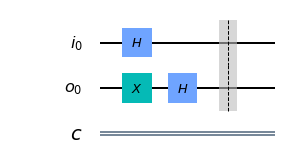

In [3]:
# Alice qubit preparation
input_register = QuantumRegister(1, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(1, "c")

circuit_Deutsch = QuantumCircuit(input_register, output_register, classical_register)

# prepare the qubit in the output register in the |1> state
circuit_Deutsch.x(output_register[0])

# Hadamard gates on both input and output registers
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.h(output_register[0])

# add a barrier
circuit_Deutsch.barrier()

# draw the circuit 
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

Now Alice sends to Bob the qubits and Bob should choose one of the four functions (circuits) [[2](https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie)] to apply to the qubits.

In [4]:
# Bob's four functions/circuits

# the first option: constant f(0) = f(1) = 0
circuit_Bob1 = QuantumCircuit(input_register, output_register)
circuit_Bob1.barrier()

# the second option: constant f(0) = f(1) = 1
circuit_Bob2 = QuantumCircuit(input_register, output_register)
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.barrier()

# the third option: balanced f(0) = 0 & f(1) = 1
circuit_Bob3 = QuantumCircuit(input_register, output_register)
circuit_Bob3.cx(input_register[0], output_register)
circuit_Bob3.barrier()

# the fourth option: balanced f(0) = 1 & f(1) = 0
circuit_Bob4 = QuantumCircuit(input_register, output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.cx(input_register[0], output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.barrier()

Now Bob will choose randomly what circuit to implement. Note that for Alice the applied circuit will be unknown: for her, it is a black box.

The circuit with Bob's chosen function


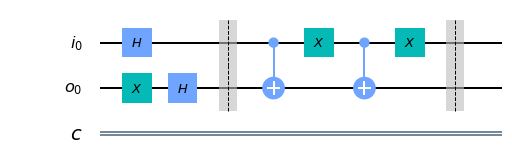

In [5]:
import random
list_options_Bob = [circuit_Bob1, circuit_Bob2, circuit_Bob3, circuit_Bob4]
circuit_Bob_choice = random.choice(list_options_Bob)

# add the chosen circuit to the original circuit
circuit_Deutsch += circuit_Bob_choice

# draw the circuit 
print("The circuit with Bob's chosen function")
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

After applying the chosen function/circuit, Bob sends back the qubits to Alice. 

The final version of the circuit


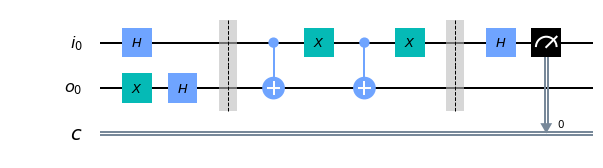

In [6]:
# Alice's final operations
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.measure(input_register[0], classical_register[0])

# draw the final version of the circuit 
print("The final version of the circuit")
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

In [7]:
# The execution of the circuit
counts = execute(circuit_Deutsch, simulator, shots=1).result().get_counts()

# finding the only key/measurement outcome
measurement_result = list(counts.keys())[0]
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# from the final measurement result Alice deduces
# is the chosen/applied function balanced or constant
if measurement_result == '0':
    print("Bob's chosen function was constant")
elif measurement_result == '1':
    print("Bob's chosen function was balanced")

The results of the measurements: {'0': 1}
The final result is: 0
Bob's chosen function was constant


Note that if Alice and Bob will choose to play their "game" not with a quantum computer, but with a classical computer, Alice will need to send two different sets of bits to figure out is Bob's function balanced or not. Moreover, Bob should do execution of the $f(x)$ function for both cases separately. With the quantum computer as we already have seen one execution of $f(x)$ is enough. This seems not a big deal, but suppose that the cost of running the $f(x)$ function is $1m$ dollars [[3]] (Bob rents some computation time from some company that has quantum computers and classical computers). If they are using quantum computer Bob will spend only $1m$ dollars, and if they use the classical computer they will spend $2m$ dollars. In this sense, the quantum computer is preferable than the classical one for playing this "game". So, in this way, the Deutsch algorithm shows us the possible advantages that we can obtain from using quantum computers. The demonstration of the advantage described here comes from two main sources: quantum parallelism and quantum interference.

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

<h3 align="left">
3. The Deutsch-Jozsa algorithm
</h3>

Deutsch-Jozsa algorithm is the $n$ qubit version of the Deutsch algorithm. The functions now take $n$ bit strings (e.g. "0101011") as an input and return one bit output ($0$ or $1$). Bob still is allowed only to use either balanced or constant functions and Alice should find out the property of that function (is it constant or balanced). Bob has two options for constant functions (for all imput bit strings $x$ the $f(x) = 0$ or $f(x) = 1$) and $\begin{pmatrix} 2^n \\ 2^{n - 1} \end{pmatrix}$ options to choose a balanced function. The main steps of the algorithm are presented in the following circuit (a modified version of the Fig.1.20 from the [[1]]):

<img src="images/Deutsch_Jozsa.png" alt="drawing" width="600"/>

where $\left| 0 \right\rangle^{\otimes n}$, means that we have $n$ qubits in the input register, $H^{\otimes n}$ means applying $n$ Hadamard gates on each qubit in that register, $M^{\otimes n}$ is $n$ measurements executed on $n$ (all) qubits. As you can see the circuit is very similar to the circuit from Deutsch algorithm. Now we will go through the steps of the Deutsch-Jozsa algorithm. After $n$ Hadamard gates applied on the input register and one Hadamard gate applied on the output register we will have [[1]]:

$$
\left| \psi_1 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
$$

where the sum is over all possible $x$ bit stings. Then Bob applies chosen $f(x)$ function and obtains the $\left| \psi_2 \right\rangle$ state:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \oplus f(x) \right\rangle - \left| 1 \oplus f(x) \right\rangle}{\sqrt{2}}
$$

Note that $f(x)$ is either $0$ or $1$ for given $x$, so:

\begin{align*}
&\text{if f(x) = 0}\;\;\;  (+1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\\
&\text{if f(x) = 1}\;\;\;  (-1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\end{align*}

By taking into account the expressions written above the $\left| \psi_2 \right\rangle$ state will take the following form:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} = 
\frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\left| - \right\rangle
$$

Now the qubits are back to Alice. She applies Hadamard gates on the input register and obtains in the input register $H^{\otimes n} \frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{f(x)}\left| x \right\rangle$. This is enough to calculate what is the probability of measuring $\left|00...0 \right\rangle = \left| 0^{\otimes n} \right\rangle$ state, that will indicate whether the function is balanced or constant. For that, firstly, we should take the inner product of $\left| 0^{\otimes n} \right\rangle$ state and $H^{\otimes n} \frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{f(x)}\left| x \right\rangle$ state (similar to [[4]]):

\begin{equation*}
\left\langle 0^{\otimes n} \right| H^{\otimes n} \frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle = \frac{1}{2^n}\sum_{y} \left\langle y \right|  \sum_{x} (-1)^{f(x)}\left| x \right\rangle = 
\frac{1}{2^n}\sum_{x,y} (-1)^{f(x)} \delta_{x,y}  = \frac{1}{2^n}\sum_{x} (-1)^{f(x)}
\end{equation*}

where we took into account that $\left\langle 0^{\otimes n} \right| H^{\otimes n} =  \frac{1}{\sqrt{2^n}} \sum_{y} \left\langle y \right|$ and $\left\langle y \right| \left| x \right\rangle = \delta_{x,y}$, $\delta_{x=y} = 1$ and $\delta_{x \ne y} = 0$, because of the orthonormality of the states. If we have a constant function ($f(x) = 1$ for all $x$ or $f(x) = 0$ for all $x$) then the probability of measuring $\left| 0^{\otimes n} \right\rangle$ will be equal to $1$ (we should take the square of the module of the inner product in order to obtain the probability). So, if the function is constant then Alice always will measure $\left| 0^{\otimes n} \right\rangle$. Otherwise, if Bob's chosen function is balanced then half of the $(-1)^{f(x)}$ terms in the sum will be equal to $-1$, and the other half will be equal to $+1$, because of the definition of the balanced function. So, $\frac{1}{2^n}\sum_{x} (-1)^{f(x)} = 0$ for a balanced function, thus Alice will have $0$ probability of measuring $\left| 0^{\otimes n} \right\rangle$. Therefore, if Alice measures $\left| 0^{\otimes n} \right\rangle$ it is an indicator that the function was constant, otherwise, if she doesn't measure $\left| 0^{\otimes n} \right\rangle$ then Bob's function was balanced.

For this procedure, Bob will need to execute the circuit that corresponds to the chosen function only one time (like in the Deutsch algorithm). Classical deterministic approach for this problem will require to execute $f(x)$ function $2^{n-1} + 1$ times in the worst-case scenario. Thus Alice and Bob are happy with their quantum computer.

For simplicity, in the implementation, we will allow Bob to use only two functions: one is a constant $f(x) = 1$ function, that can be implemented by applying $x$ gate on the output qubit, and the second one is the function that we have used in the quantum parallelism chapter that is actually an example of a balanced function. The implementation is done for 4 qubits:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

In [8]:
# Alice: qubit preparation
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(3, "c")

circuit_Deutsch_Jozsa = QuantumCircuit(input_register, output_register, classical_register)

# prepare the qubit in the output register in the |1> state
circuit_Deutsch_Jozsa.x(output_register[0])

# Hadamard gates on both input and output registers
circuit_Deutsch_Jozsa.h(input_register) # Hadamard gate is applied to all qubits in the input_register
circuit_Deutsch_Jozsa.h(output_register[0])

# add a barrier
circuit_Deutsch_Jozsa.barrier()

Alice sends the qubits to Bob. Bob applies $f(x) = 1$ constant function and sends back the qubits to Alice. Alice measures the qubits in the input register and finds out the property of the function (constant or balanced):

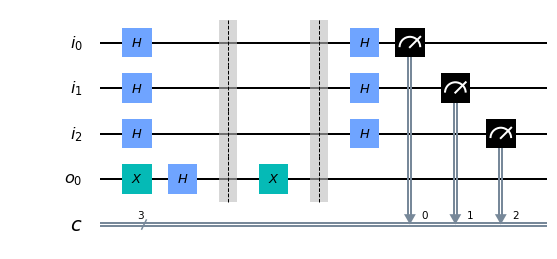

In [9]:
# Circuit for the constant case
circtuit_Deutsch_Jozsa_constant  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_constant += circuit_Deutsch_Jozsa

# implementing f(x) = 1 constant function
circtuit_Deutsch_Jozsa_constant.x(output_register[0])

# add a barrier
circtuit_Deutsch_Jozsa_constant.barrier()

# final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_constant.h(input_register)

# measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_constant.measure(input_register, classical_register)

# draw the circuit 
%matplotlib inline
circtuit_Deutsch_Jozsa_constant.draw(output="mpl")

In [10]:
# The execution of the circuit
counts = execute(circtuit_Deutsch_Jozsa_constant, simulator, shots=1).result().get_counts()

# finding the only key/measurement outcome
measurement_result = list(counts.keys())[0]
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# Alice checks if Bob's function was constant or balanced
if '000' in counts:
    print("Bob's chosen function was constant")
else:
    print("Bob's chosen function was balanced")

The results of the measurements: {'000': 1}
The final result is: 000
Bob's chosen function was constant


Now we will do the same calculations but for a balanced $f(x)$ function that we have used in the quantum parallelism chapter.

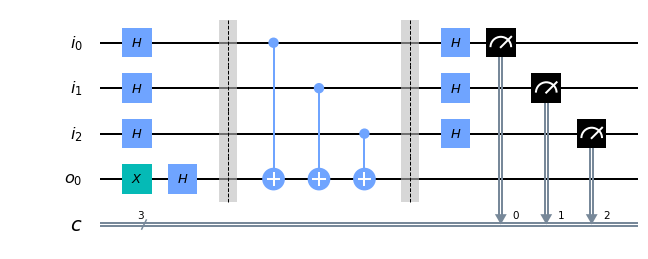

In [11]:
# Circuit for the balanced case
circtuit_Deutsch_Jozsa_balanced  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_balanced += circuit_Deutsch_Jozsa

# implementing the balanced function
circtuit_Deutsch_Jozsa_balanced.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[1], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[2], output_register[0])

# add a barrier
circtuit_Deutsch_Jozsa_balanced.barrier()

# final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.h(input_register)


# measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.measure(input_register, classical_register)

# draw the circuit 
%matplotlib inline
circtuit_Deutsch_Jozsa_balanced.draw(output="mpl")

In [12]:
# The execution of the circuit
counts = execute(circtuit_Deutsch_Jozsa_balanced, simulator, shots=1).result().get_counts()

# finding the only key/measurement outcome
measurement_result = list(counts.keys())[0]
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# Alice checks if Bob's function was constant or balanced
if '000' in counts:
    print("Bob's chosen function was constant")
else:
    print("Bob's chosen function was balanced")

The results of the measurements: {'111': 1}
The final result is: 111
Bob's chosen function was balanced


**[[Homepage][5]]**

<h3 align="left">
References
</h3>

[[1]] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)][1]

[[2]] [A question about implementing four oracles for the Deutsch algorithm in the Quantum Computing Stack Exchange][2]

[[3]] [Video lecture "24. Entanglement — QComputing, EPR, and Bell" by Allan Adams: starting from 50:20 the Deutsch algorithm][3]

[[4]] [edx course: Quantum Information Science I, Part 2][4]


  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [6]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_parallelism_Deutsch_Jozsa.ipynb